# Applied Time Series Analysis: Exam 2 - Problem 2




* Created by Conrad Ning 
* Last edited: 2021-04-01



##Problem 2:

Go back to Exercise 2.1 in the course notebook and perform the same duplicate packet analysis on the following sensor measurements using the 15-minute ensemble mean:
* voltage
* hum
* humtemp

Which of these three sensor measurements is most impacted (based on Pearson's R, R-squared, and RMSE) by the presence of duplicated data? In 250 words or less, support your answer.

Your submission should be an .ipynb or .pdf that includes three plots:

* voltage (original) vs. voltage (duplicate free) at 15 minutes (ensemble mean)
* hum (original) vs. hum (duplicate free) at 15 minutes (ensemble mean)
* humtemp (original) vs. humtemp (duplicate free) at 15 minutes (ensemble mean)

The plots should include appropriate axes labels, title, and legend as well as the number of points, N, and the comparitive statistics (e.g., Pearson's R, R-squared, and RMSE). Include your response to the question above. As a supplement, include the code you used.



The following three plots are the 15 minutes ensemble mean for the original and duplicate free data of three varaibles, voltage, humidity, and temperature. 

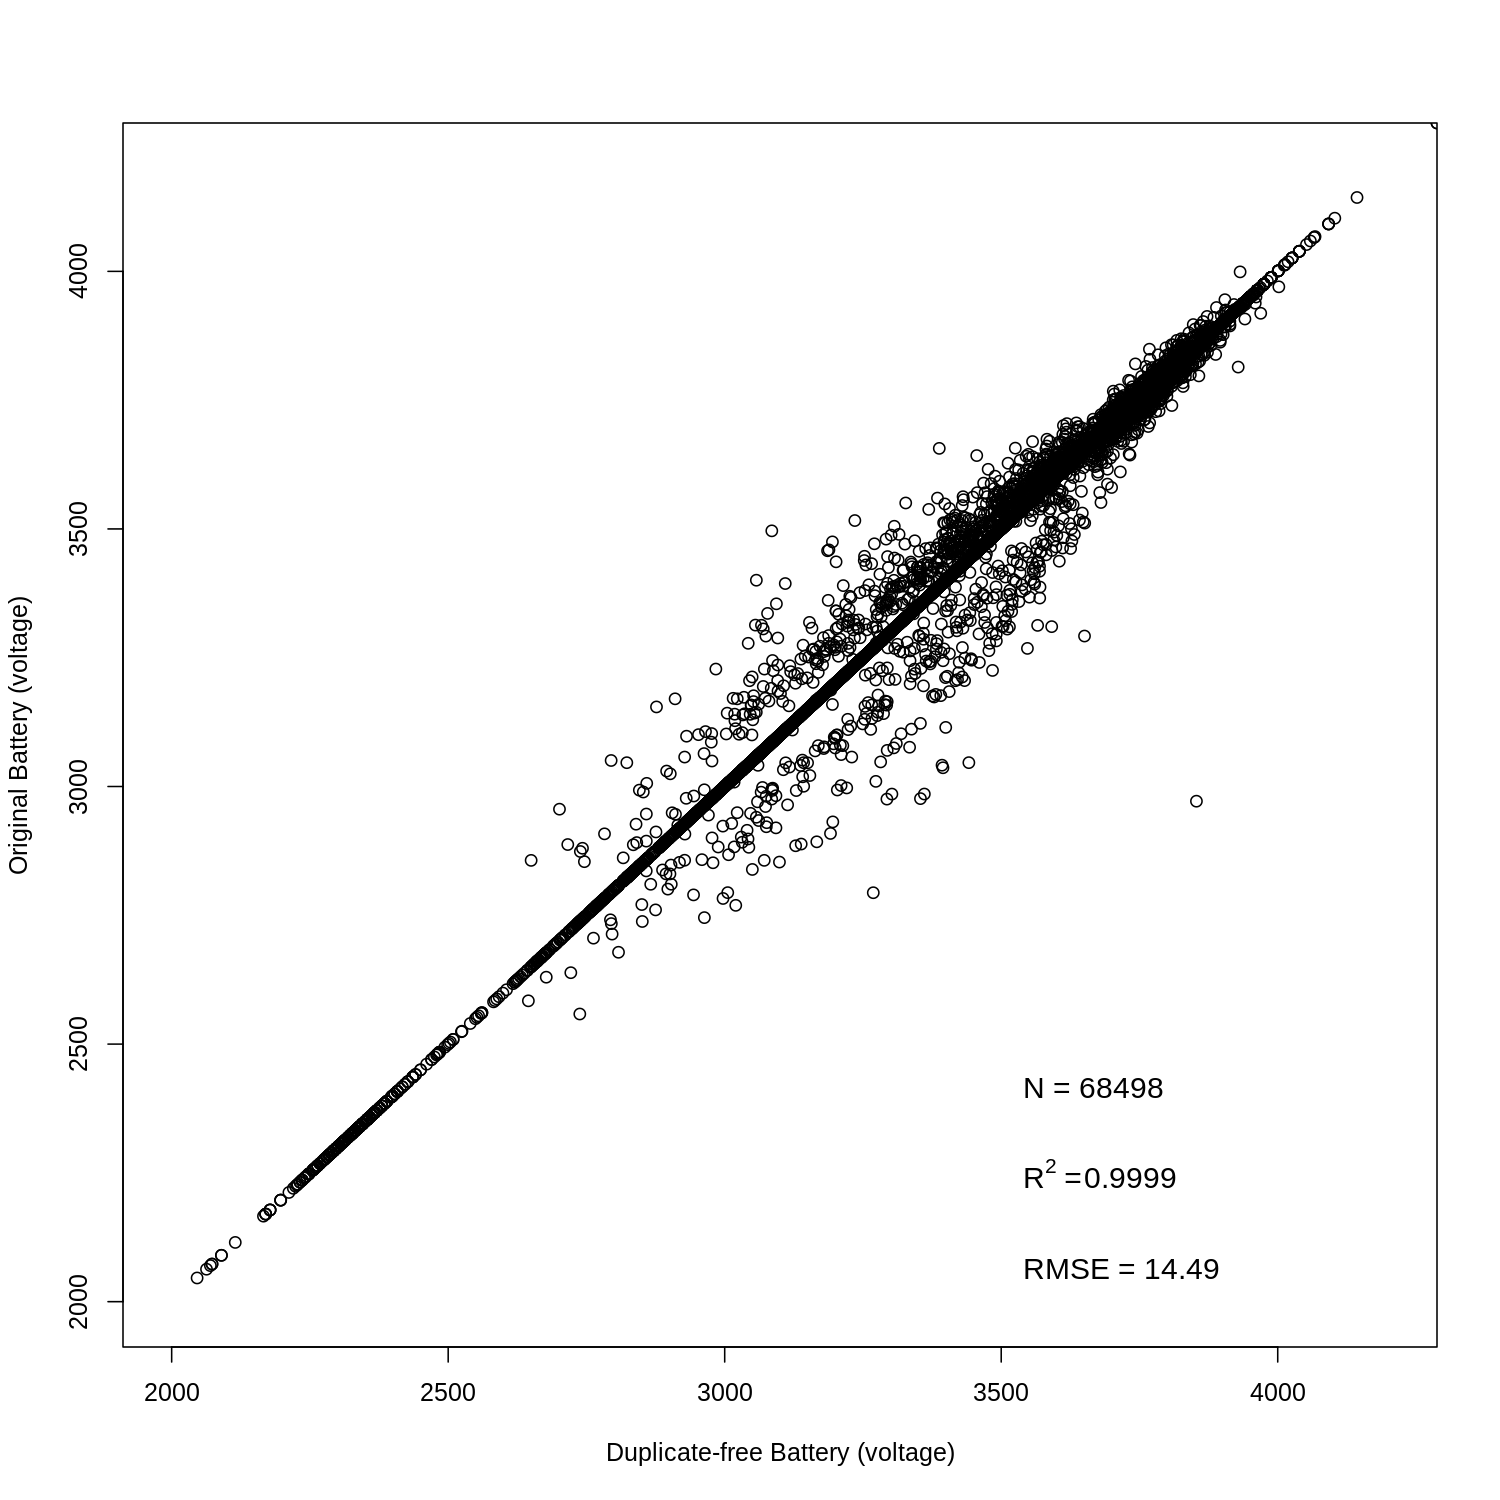

In [ ]:
# Voltage
createPlots(x, y, variable = 'voltage',lim = c(2000, 4200), xlab = 'Duplicate-free Battery (voltage)', 
                                                ylab = "Original Battery (voltage)")

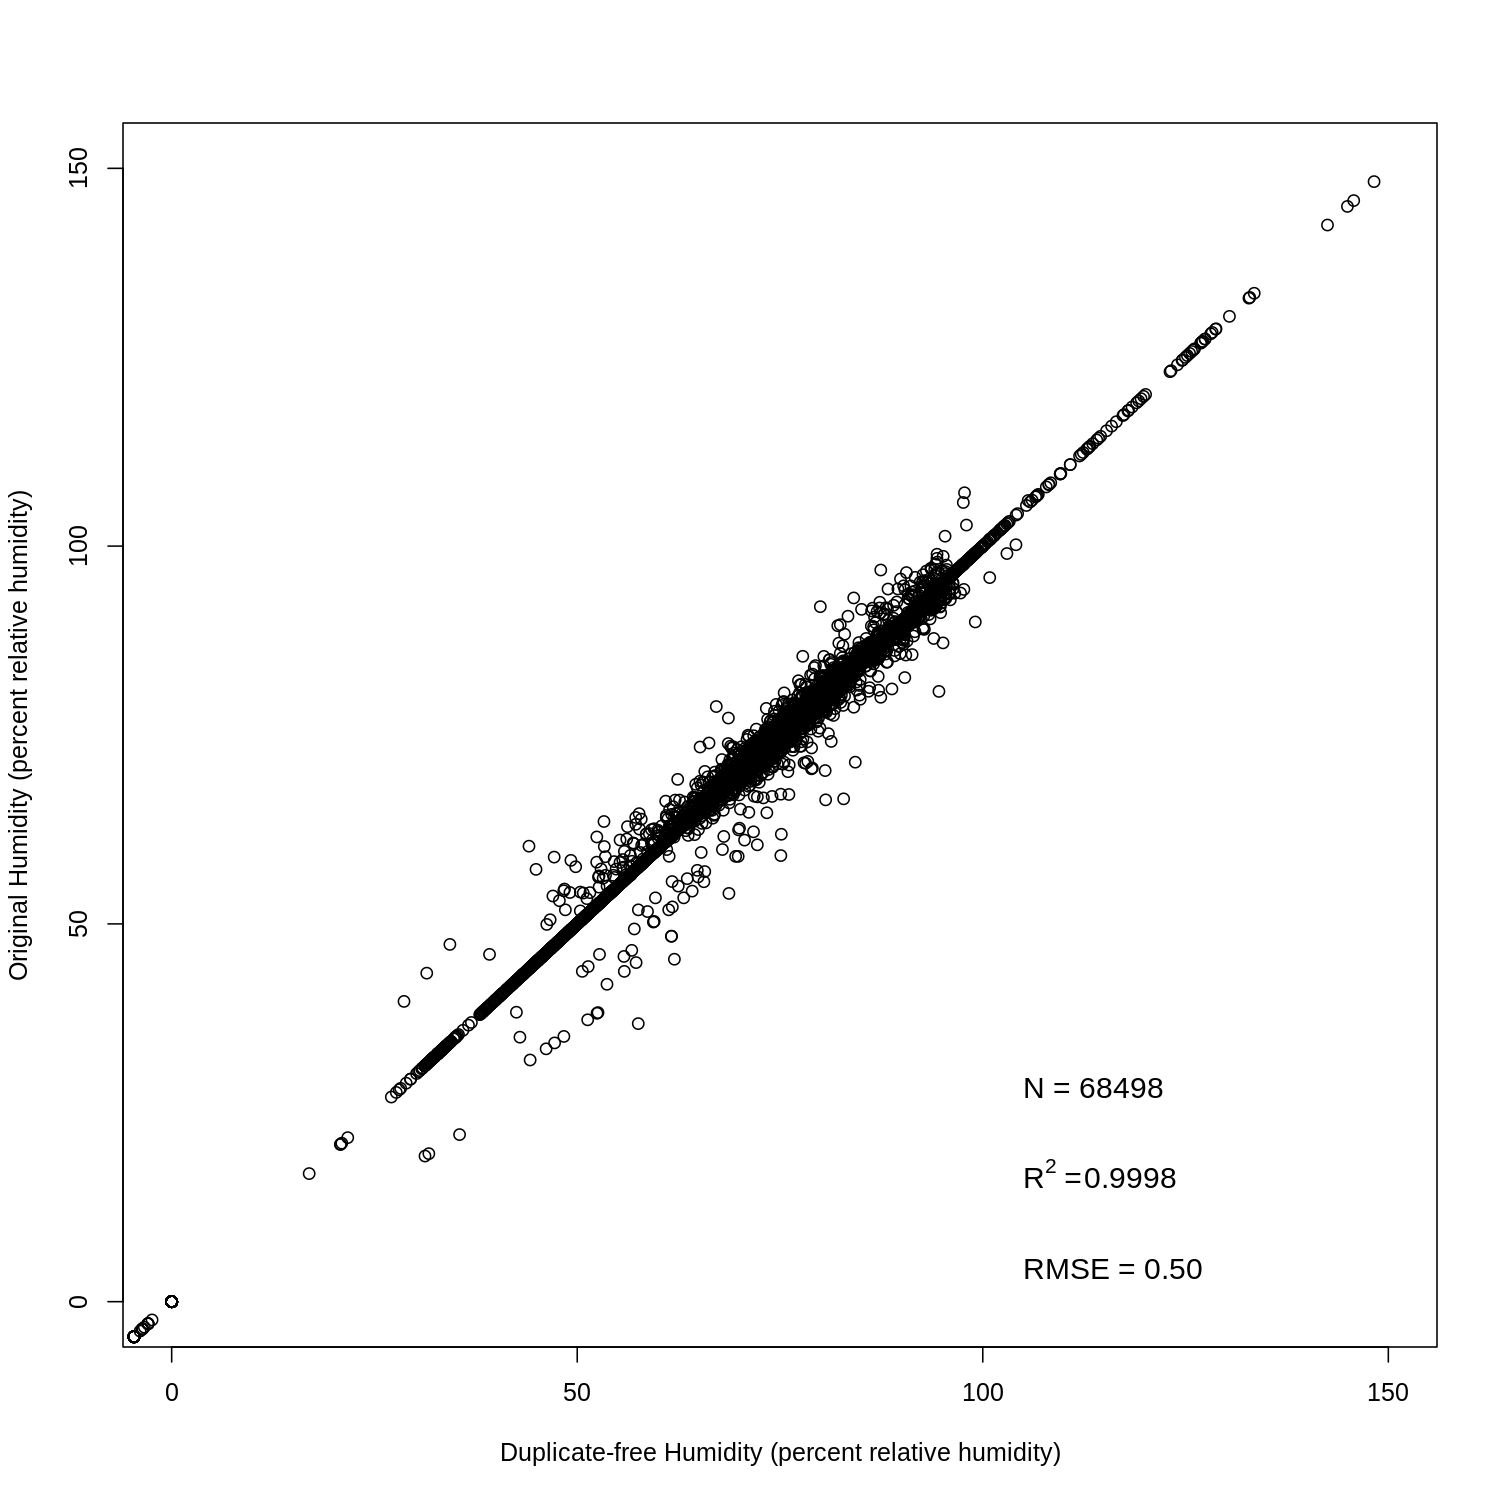

In [ ]:
# Humidity
createPlots(x, y, variable = 'hum' ,lim = c(0, 150), xlab = 'Duplicate-free Humidity (percent relative humidity)', 
                                                ylab = "Original Humidity (percent relative humidity)")

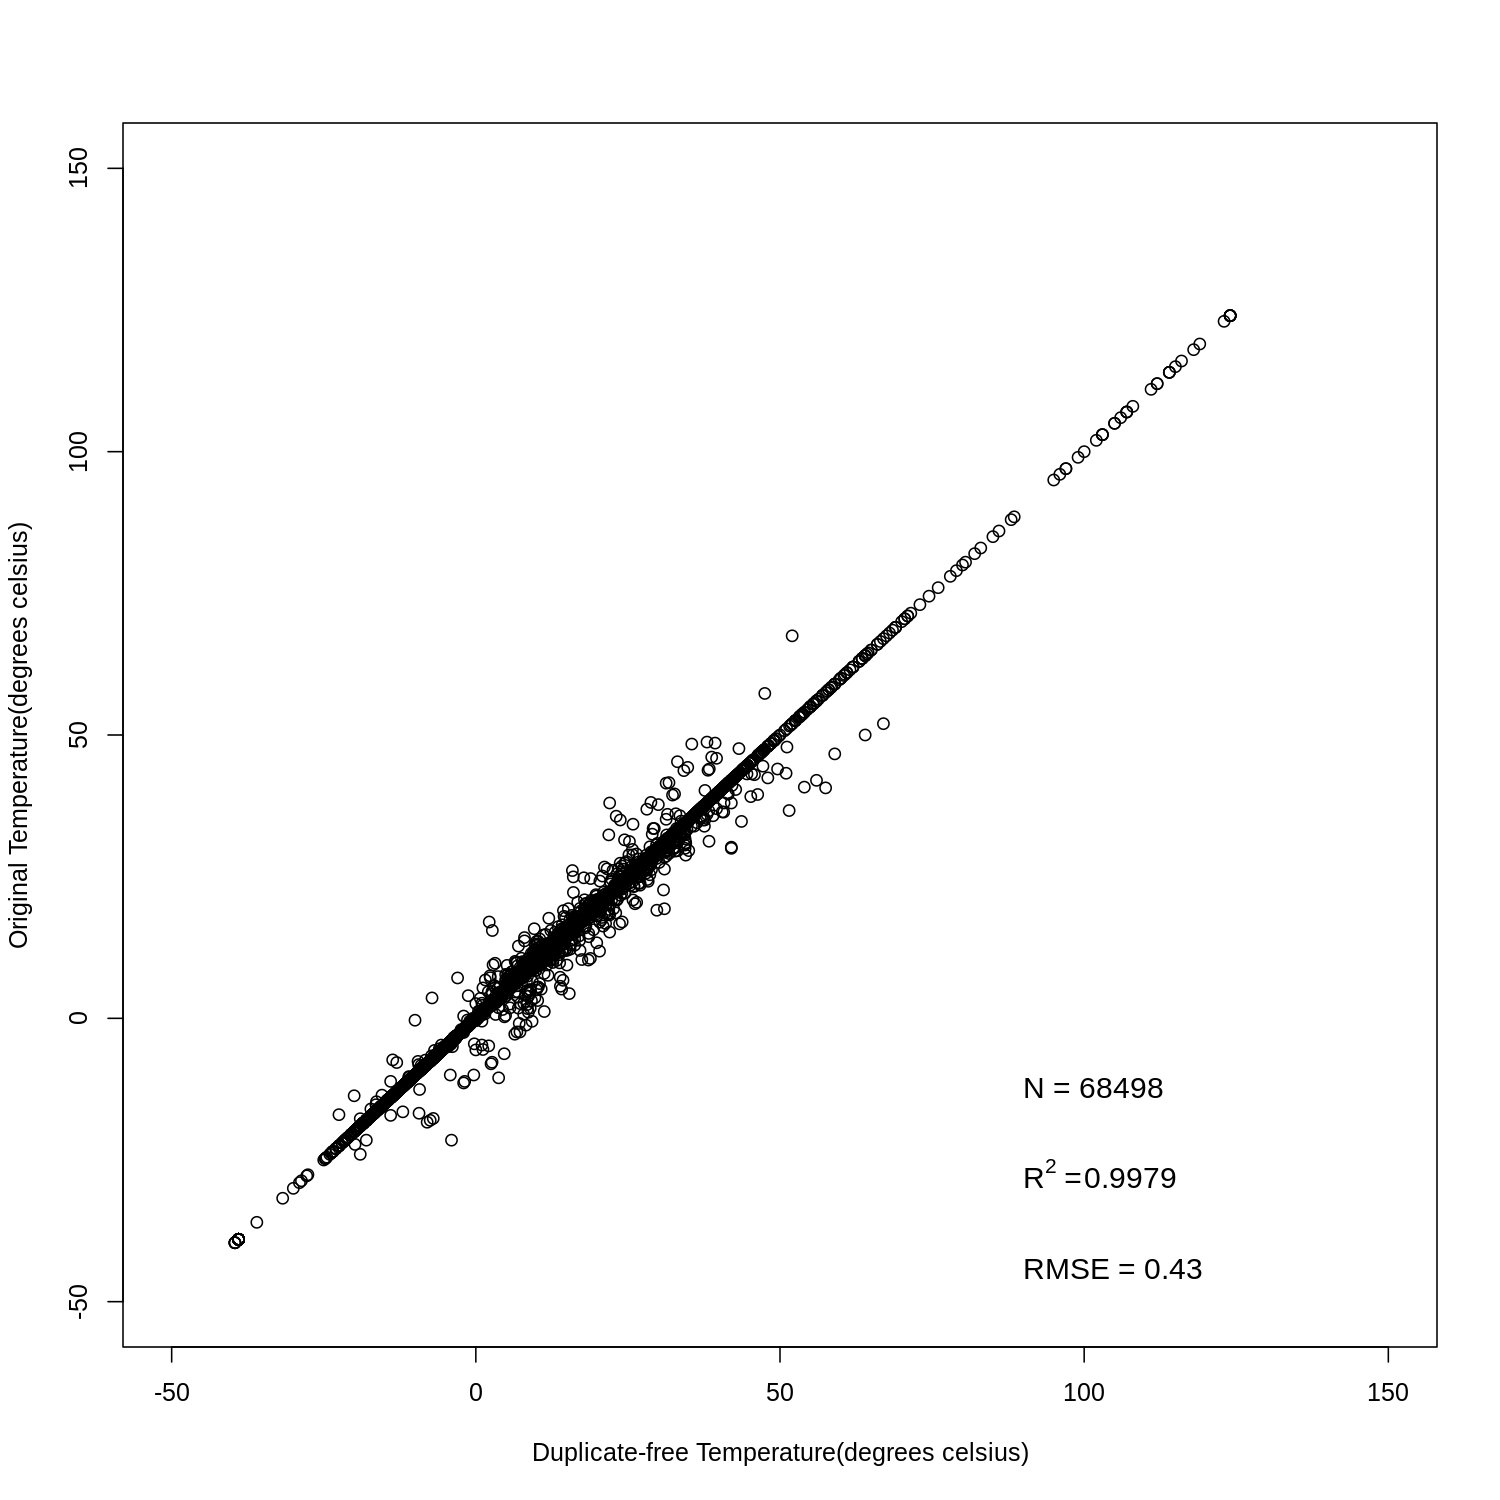

In [ ]:
# Temperature 
createPlots(x, y, variable = 'humtemp' ,lim = c(-50, 150), xlab = 'Duplicate-free Temperature(degrees celsius)', 
                                                ylab = "Original Temperature(degrees celsius)")

# Answer:
With 15 minutes time interval, there are 68,498 samples. The high value of Pearson's R implies the high linear correlation between the original and duplicate-free data. We can see that all three plots also have high R-squared value, which means that more than 99% of sample variation of original data are explained by each model. The three plots are produced from the methodology below. From these two statistical inferences, we are unable to find which of these sensor measurements are most impacted by the duplicate values in the data. 

Hence, we look at the value of Root Mean Square Error (RMSE) for the three measurements. RMSE is the indicator of the error of a model in predicting values. In our case, the observing values is the original data and the predicting values is duplicate-free data. The lower value of RMSE, the better the fit of the model, which also indicates the higher predictive value. Voltage has the highest RMSE value, 14.49, which is a lot higher than humidity (0.50) and temperature (0.43). Hence, out of the three sensor measurements, voltage is the most impacted sensor measurement from the duplicated data. 

**Methodology**

With the foundation of Exercise 2.1, we will be applying the same code snippets but adjusting to the new variables and plot features. We will also be looking at 15 minutes ensemble mean only. 


In [2]:
install.packages('latex2exp')
library(latex2exp)
install.packages('Metrics')
library(Metrics)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
removeDuplicates <- function(data, timeBoundary = 450){

  duplicateVector = c()
  numRow <- length(data$result_time)

  duplicateVector = c(duplicateVector, TRUE)
  startTime <- strptime(data$result_time[1], "%Y-%m-%d %H:%M:%S")

  for (i in 2:numRow){

    nextTime <- strptime(data$result_time[i], "%Y-%m-%d %H:%M:%S")
    timeDifference <- as.numeric(difftime(nextTime, startTime, units = c("secs")))

    if (timeDifference > timeBoundary){
      duplicateVector = c(duplicateVector, TRUE)
      startTime <- strptime(data$result_time[i], "%Y-%m-%d %H:%M:%S")
    }
    else{
      duplicateVector = c(duplicateVector, FALSE)
    }
  }
  return(data[duplicateVector,])
}


In [4]:
mergeDF <- function(listofdf){
  comboDf <- Reduce(function(x, y) merge(x, y, sort = TRUE, all = TRUE), listofdf)
  return(comboDf)
}

In [5]:
aggregateOverTime <- function(variable, timePeriod, data)
{
  LEN <- length(data$result_time)

  # initialize variables
  v <- c()
  currentCount <- 0
  numIteration <- 0

  # set time for begining of first period
  periodStart <- strptime("2010-05-29 07:00:00", "%Y-%m-%d %H:%M:%S")

  # iterate through each row of the dataframe
  for (i in 1:LEN)
  {
    # calculate the difference in time between the beginning of the period and the current row
    currentTime <- data$result_time[i]
    timeDifference <- as.numeric(difftime(currentTime, periodStart, units = c("secs")))

    # if the time difference is less then the period
    if (timeDifference <= timePeriod)
    {
      # increment the variables
      currentCount <- currentCount + data[[variable]][i]
      numIteration <- numIteration + 1
    }
    # if the time difference is greater then the period
    else
    {
      # append the average value of the variable being tracked to a vector
      v <- c(v, currentCount / numIteration)
      
      # calculate how many periods were skipped and when the next period begins
      sinceStart <- as.numeric(difftime(currentTime, periodStart, units = c("sec")))
      periodsSkipped <- floor(sinceStart / timePeriod)
      periodTemp <- periodStart + (periodsSkipped * timePeriod)

      # append a zero to the vector for each period skipped 
      if(periodsSkipped - 1 > 0)
      {
        temp <- rep(c(0), times = periodsSkipped - 1)
        v <- c(v, temp)
      }
      
      # redefine periodStart as the beginning of the new period
      periodStart <- periodTemp

      # initialize variables for new period
      currentCount <- data[[variable]][i]
      numIteration <- 1
    }
  }
  return(v)
}

In [6]:
# Load Data
data2003 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2003.txt")
data2015 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2015.txt")
data2025 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2025.txt")
data2045 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2045.txt")
data2055 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2055.txt")
data2065 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2065.txt")
data2085 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2085.txt")
data2095 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2095.txt")
data2103 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2103.txt")
data2115 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2115.txt")
data2125 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2125.txt")
data2135 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2135.txt")

dataList <- list(data2003, 
                 data2015,
                 data2025,
                 data2045,
                 data2055,
                 data2065,
                 data2085,
                 data2095,
                 data2103,
                 data2115,
                 data2125,
                 data2135)

In [7]:
dpFree2003 <- removeDuplicates(data2003)
dpFree2015 <- removeDuplicates(data2015)
dpFree2025 <- removeDuplicates(data2025)
dpFree2045 <- removeDuplicates(data2045)
dpFree2055 <- removeDuplicates(data2055)
dpFree2065 <- removeDuplicates(data2065)
dpFree2085 <- removeDuplicates(data2085)
dpFree2095 <- removeDuplicates(data2095)
dpFree2103 <- removeDuplicates(data2103)
dpFree2115 <- removeDuplicates(data2115)
dpFree2125 <- removeDuplicates(data2125)
dpFree2135 <- removeDuplicates(data2135)

dpFreeList <- list(dpFree2003, 
                   dpFree2015,
                   dpFree2025,
                   dpFree2045,
                   dpFree2055,
                   dpFree2065,
                   dpFree2085,
                   dpFree2095,
                   dpFree2103,
                   dpFree2115,
                   dpFree2125,
                   dpFree2135) 

In [8]:
origAgg <- mergeDF(dataList)
origAgg$result_time <- strptime(origAgg$result_time, "%Y-%m-%d %H:%M:%S")

dpFreeAgg <- mergeDF(dpFreeList)
dpFreeAgg$result_time <- strptime(dpFreeAgg$result_time, "%Y-%m-%d %H:%M:%S")

In [10]:
createDataTable <- function(time, data)
{
  voltage <- aggregateOverTime(variable = 'voltage', timePeriod = time, data = data)

  hum <- aggregateOverTime(variable = 'humid', timePeriod = time, data = data)

  humtemp <- aggregateOverTime(variable = 'humtemp', timePeriod = time, data = data)

  return(data.frame(voltage,hum,humtemp))
}

In [11]:
# origional data

origMin15 <- createDataTable(15*60, origAgg)

# duplicate free data

dpFreeMin15 <- createDataTable(15*60, dpFreeAgg)

In [50]:
createPlots <- function(origionalData, duplicateFreeData, variable, lim, xlab, ylab)
{
  options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 150)

  x = data.frame(duplicateFreeData)[[variable]]
  y = data.frame(origionalData)[[variable]]
  plot(x, y, xlab = xlab, ylab = ylab, xlim = lim, ylim = lim)

  rT <- round(summary(lm(x ~ y))$r.squared, 4)
  rmseT <- rmse(y, x)

  width <- lim[2] - lim[1]
  ma <- max(lim)
  mi <- min(lim)

  text(ma - width*.30, mi + width*.18, sprintf('N = %d', length(x)), cex = 1.2, adj = c(0, 0))
  text(ma - width*.30, mi + width*.10, TeX('$R^2 =$'), cex = 1.2, adj = c(0, 0))
  text(ma - width*.25, mi + width*.10, rT, cex = 1.2, adj = c(0, 0))
  text(ma - width*.30, mi + width*.02, sprintf('RMSE = %.2f', rmseT), cex = 1.2, adj = c(0, 0))
}

In [46]:
x <- origMin15
y <- dpFreeMin15

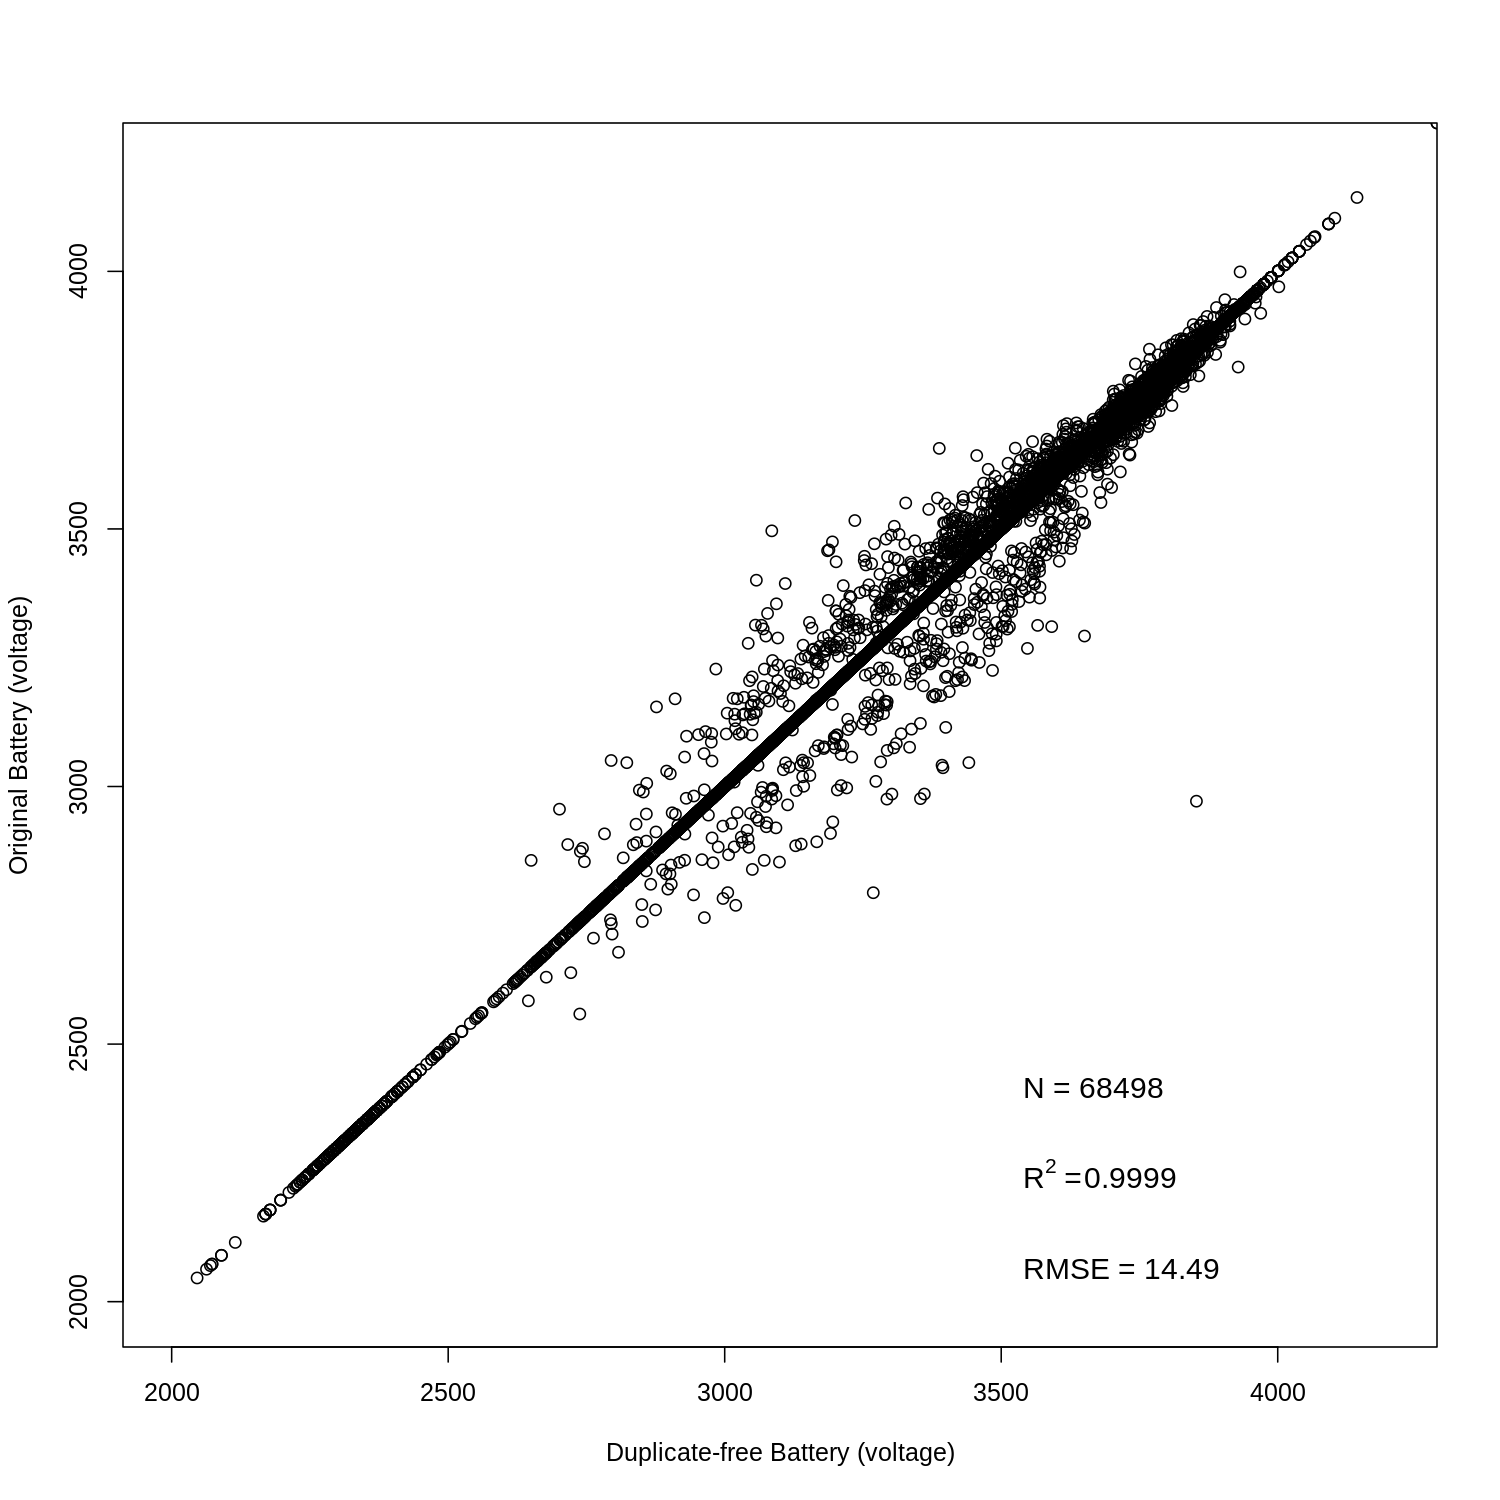

In [51]:
createPlots(x, y, variable = 'voltage',lim = c(2000, 4200), xlab = 'Duplicate-free Battery (voltage)', 
                                                ylab = "Original Battery (voltage)")

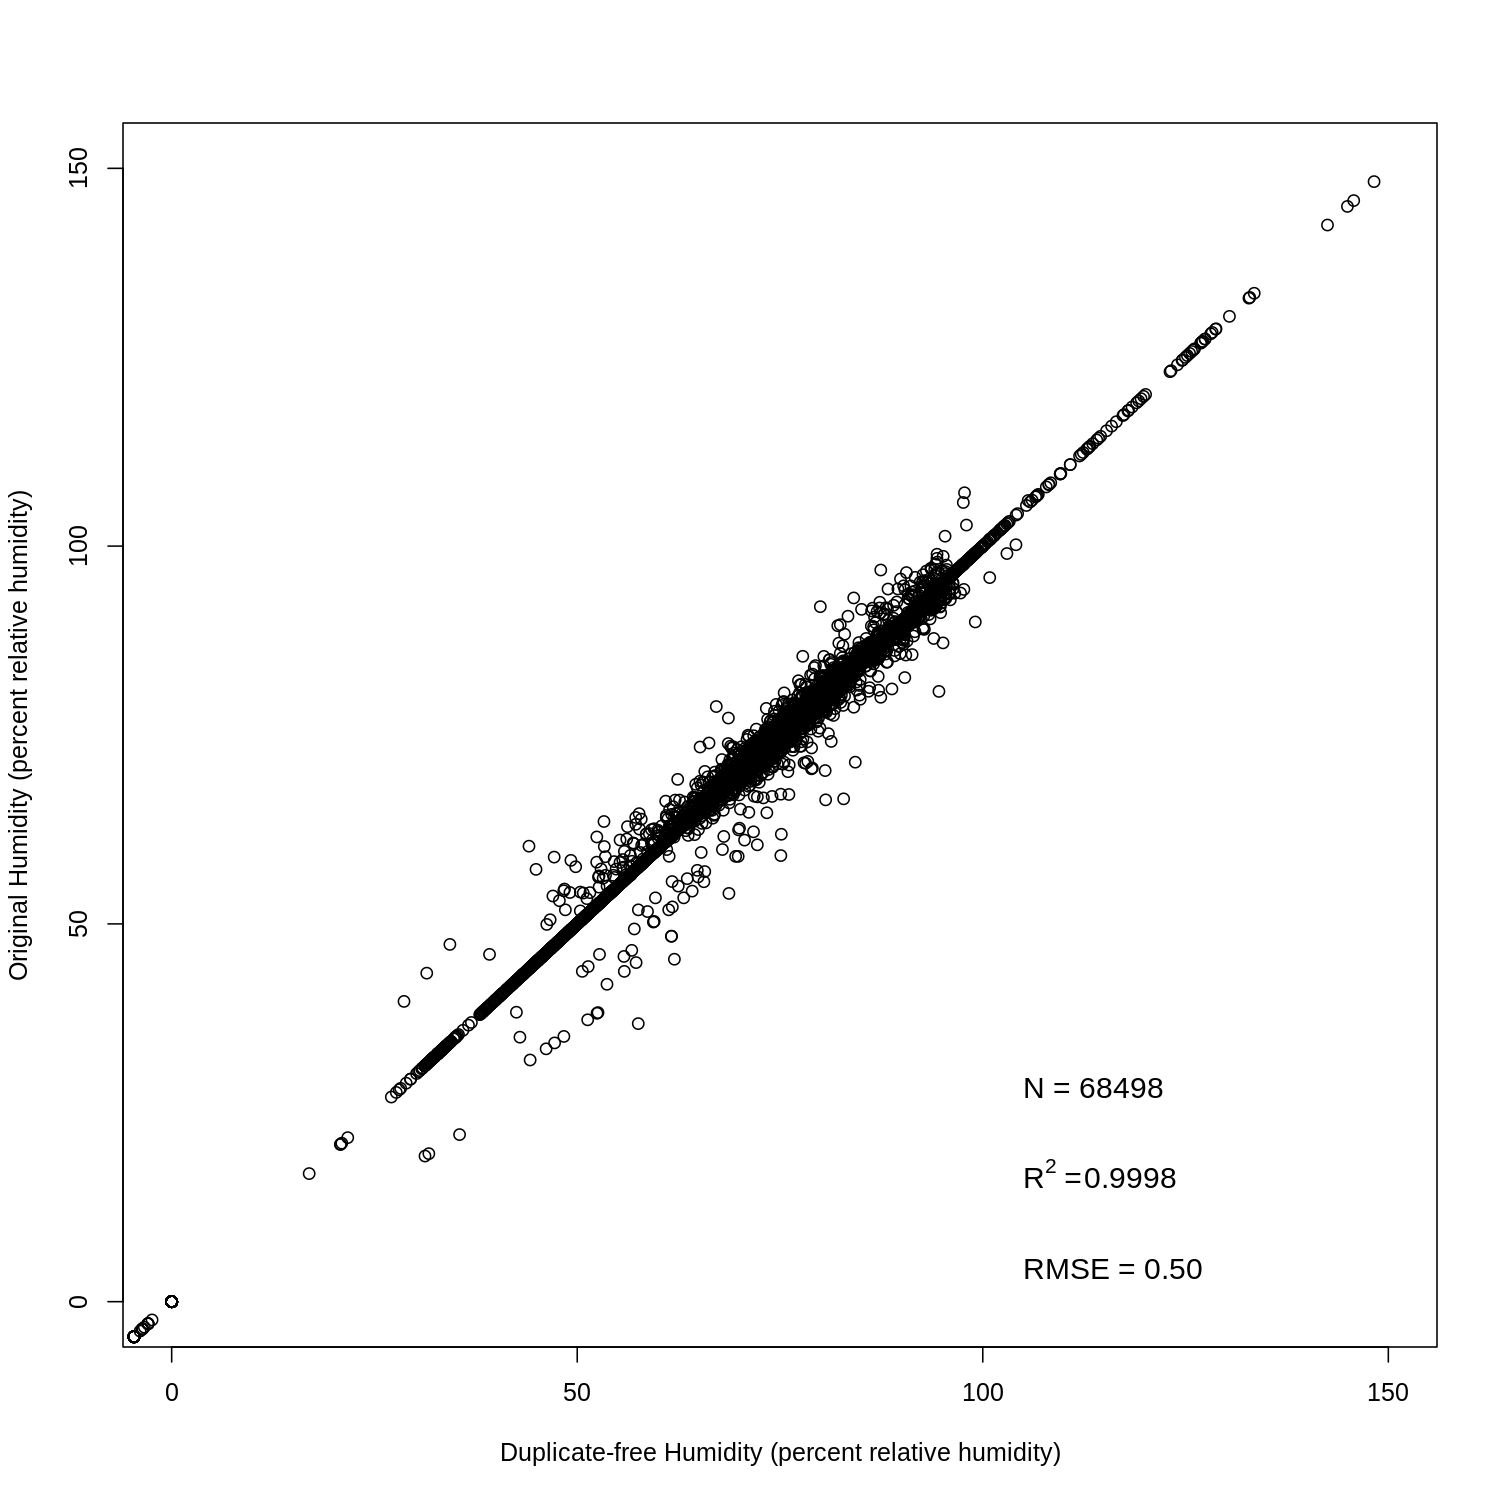

In [75]:
createPlots(x, y, variable = 'hum' ,lim = c(0, 150), xlab = 'Duplicate-free Humidity (percent relative humidity)', 
                                                ylab = "Original Humidity (percent relative humidity)")

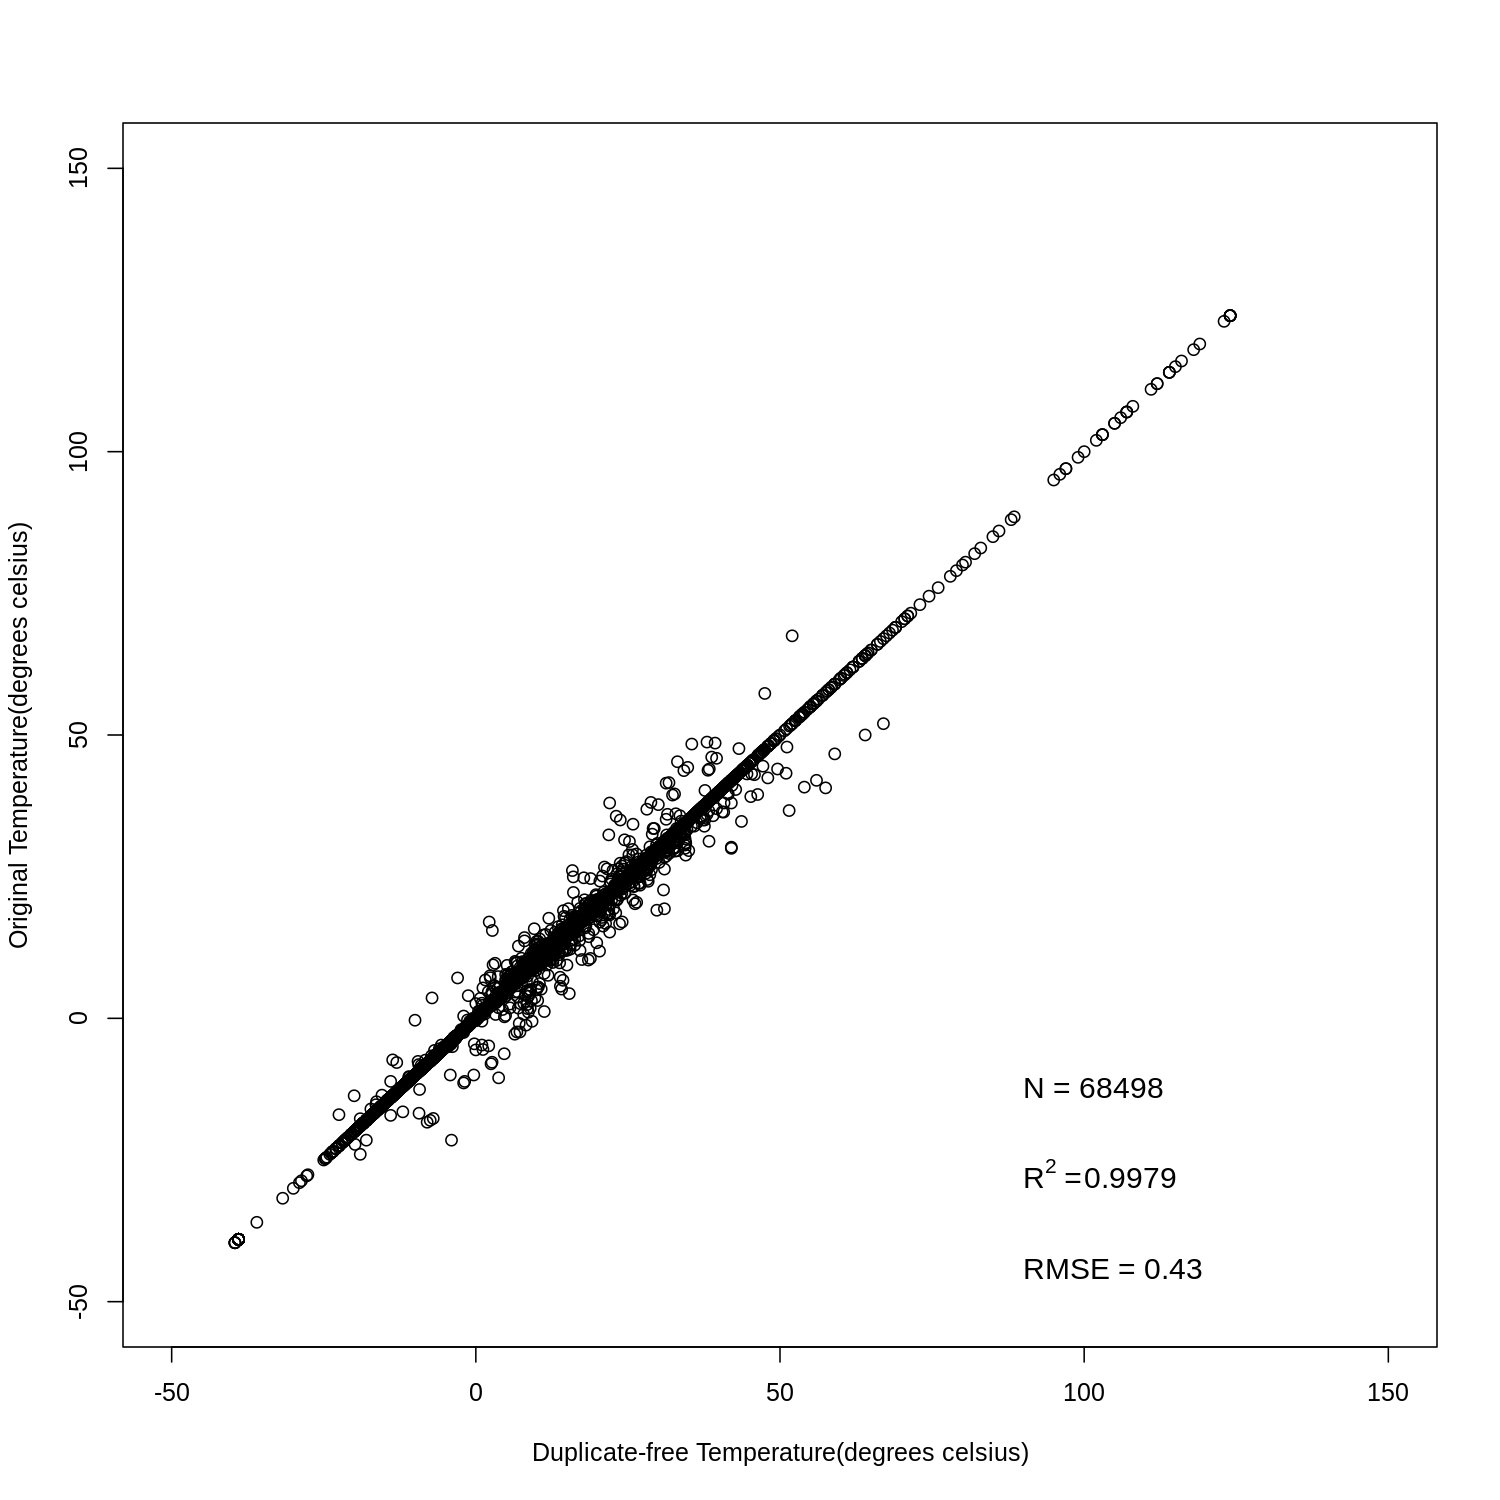

In [66]:
createPlots(x, y, variable = 'humtemp' ,lim = c(-50, 150), xlab = 'Duplicate-free Temperature(degrees celsius)', 
                                                ylab = "Original Temperature(degrees celsius)")

## References
Davis, T. W. (2012). _Environmental monitoring through wireless sensor networks_ [Doctoral dissertation, University of Pittsburgh]. [d-scholarship.pitt.edu](http://d-scholarship.pitt.edu/16531/1/DAVISTW_ETD_2012.pdf)

